In [5]:
import numpy as np
from matplotlib import pyplot as plt
import sys
sys.path.insert(0, '/Users/chris/Documents/ProjectSigma/GalaxyTools/')
import time
from GenerateParameters import GetDefaultParameters
sys.path.insert(0, '/Users/chris/Documents/ProjectSigma/VelocityDispersion/')
from SigmaLib import *


from HM2SM import halo_mass_to_stellar_mass
from Bernardi import bernardi_sigma 
from darkmatter import getC

In [6]:
# Params



HM = 12
m12 = 0.7*(10**(HM-12))
c = 10.2 * m12**-0.08

SM = 11.086
size = 3.2
n = 3.12

BHMass = 8.26

_, _, rs, rho = GetDefaultParameters(SM, z=0, halo_mass=m12)



length = 100
R_range = np.logspace(-2, 3, length)

c = np.ones_like(R_range) * c
beta = np.ones_like(R_range) * 0.0001
r_array = np.ones_like(R_range) * size
sm_array = np.ones_like(R_range) * SM
n_array = np.ones_like(R_range) * n



In [8]:
start = time.time()

complete = Sigma(ApertureSize=R_range,
            Bulge_mass=10**SM,
              Bulge_Re=r_array,
               Bulge_n=n_array,
            Bulge_Beta=0.0,
         HaloProfile="NFW",
                HaloRs=rs,
              HaloRhos=rho,
         BlackHoleMass=0.0,
          tracer_flags=[True, True],
   gravitational_flags=[True, True, True, True],
               use_vIMF=False,
                vIMF_R1=0.,
                vIMF_R0=0.,
                  mode=1,
                 debug=True,
               threads=8,
          library_path="/Users/chris/Documents/ProjectSigma/VelocityDispersion/lib/libsigma.so")


#CompleteSigmaAp = Sigma(R_range, beta, r_array, n_array, sm_array, 0, DM = "NFW", HaloMass = HM, haloC=c,
 #                        BlackHole=True, BHMass=BHMass, stars=True)
#
#StarsSigmaAp = Sigma(R_range, beta, r_array, n_array, sm_array, 0, DM = "None", HaloMass = HM, haloC=c,
 #                        BlackHole=False, BHMass=BHMass, stars=True)


end = time.time()
print(end - start, "Seconds")



15.179449081420898 Seconds


In [9]:
mlap_data_stars = np.array([[0.01000000000000001, 142.3892551591794],
                            [0.014363426769165097, 149.5792644296602],
                            [0.019512934226359652, 152.86363040639912],
                            [0.028027260181185194, 158.81889918241853],
                            [0.036687331930182206, 160.53071281999863],
                            [0.05418398816541044, 165.86072522130087],
                            [0.07158774948942687, 167.64657211887837],
                            [0.10475175077870161, 171.31239055575205],
                            [0.13968870472002962, 172.2015185232888],
                            [0.2101748011332487, 173.07021188214893],
                            [0.2725736507367312, 172.0635457518922],
                            [0.41011270705513003, 168.22239395487657],
                            [0.5318711718664555, 165.4071157912358],
                            [0.7855273132638491, 160.82765065182312],
                            [1.0187427149936819, 158.13612687579618],
                            [1.5327942796726477, 151.2285236337324],
                            [1.9878659591254741, 147.06452654960492],
                            [2.9909313961792683, 141.41928115376234],
                            [3.8789097711234706, 138.28686260634908],
                            [5.623413251903491, 135.95440557354715],
                            [7.429639507594943, 134.4163434522092],
                            [11.07528316343767, 132.14475626529259],
                            [14.49740670372633, 132.10210069172547],
                            [21.81271260987364, 131.310334984842],
                            [27.768242098727654, 131.27233290526522],
                            [43.36074887335483, 131.20220411182763],
                            [56.23413251903485, 130.4390640332544],
                            [81.52490897596898, 130.38099174632907],
                            [111.78591777554011, 131.0533047945831],
                            [177.8279410038921, 130.9803766653269]])


ml_data_tot =  np.array([[0.01000000000000001, 183.5646154491867],
                            [0.015907901866580428, 175.53453553423736],
                            [0.03281927872511476, 175.3821770690025],
                            [0.05418398816541044, 177.22318545357044],
                            [0.07710752692535532, 179.11542071403608],
                            [0.109729292912032, 179.03966373070492],
                            [0.16663805717400718, 179.94084979150972],
                            [0.22849198351169275, 179.8727533446731],
                            [0.33434401112557777, 178.80064144310205],
                            [0.5945570708544394, 174.77406448437765],
                            [0.9113336771446099, 168.99197992654572],
                            [1.504594101251712, 163.386633165437],
                            [2.3934935311747987, 158.84895926413787],
                            [3.601236248389732, 154.44762453804674],
                            [5.124805876960932, 152.68674822783242],
                            [7.568891123391602, 150.10806895184166],
                            [15.907901866580412, 149.14859588479717],
                            [26.26363527653333, 147.4218730097156],
                            [42.56300264549495, 147.33655562668827],
                            [60.570068458094134, 147.27423953495153],
                            [118.18997619088928, 147.1562392109228],
                            [198.78659591254743, 147.06452654960492]])

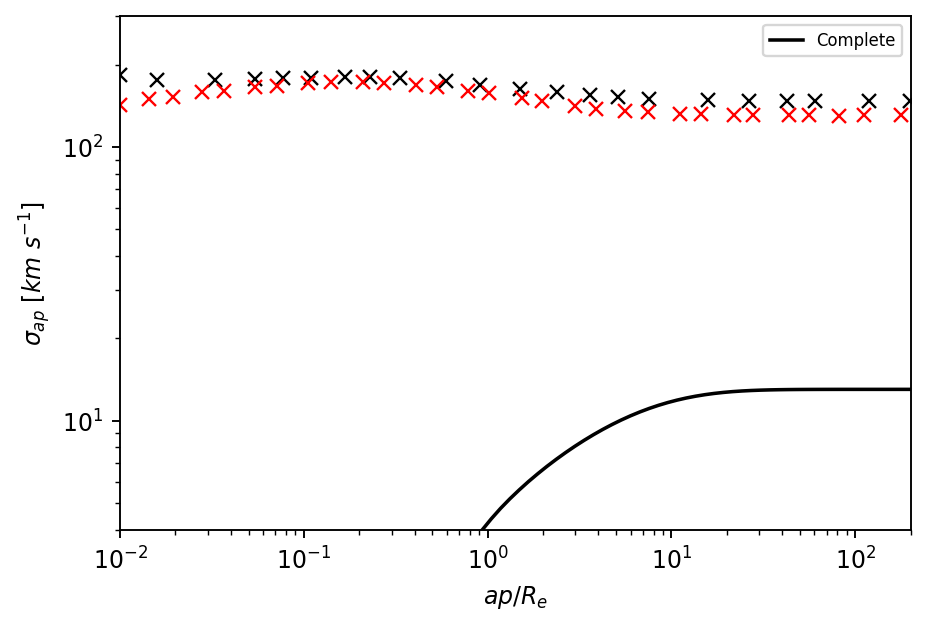

In [10]:

plt.figure(dpi=170)

plt.plot(R_range/size, complete, 'k', label = "Complete")
#plt.plot(R_range/size, StarsSigmaAp, 'r', label= "Stars")


plt.plot(ml_data_tot[:, 0], ml_data_tot[:, 1], 'xk')
plt.plot(mlap_data_stars[:, 0], mlap_data_stars[:, 1], 'xr')

plt.loglog()
plt.xlim([0.01, 200])
plt.ylim([4, 300])

plt.xlabel("$ap/R_e$")
plt.ylabel("$\sigma_{ap}$ [$km$ $s^{-1}$]")

plt.legend(fontsize = 7)

plt.show()

